# Cat Swarm Optimization for TSP

Iteration 0 | Best Cost = 431.4892145783445
Iteration 20 | Best Cost = 284.7946460143912
Iteration 40 | Best Cost = 284.7946460143912
Iteration 60 | Best Cost = 284.7946460143912
Iteration 80 | Best Cost = 284.7946460143912
Iteration 100 | Best Cost = 284.7946460143912
Iteration 120 | Best Cost = 284.7946460143912
Iteration 140 | Best Cost = 284.7946460143912
Iteration 160 | Best Cost = 284.7946460143912
Iteration 180 | Best Cost = 284.7946460143912

Best Route: [11, 2, 10, 7, 5, 1, 6, 9, 0, 3, 4, 8]
Best Cost : 284.7946460143912


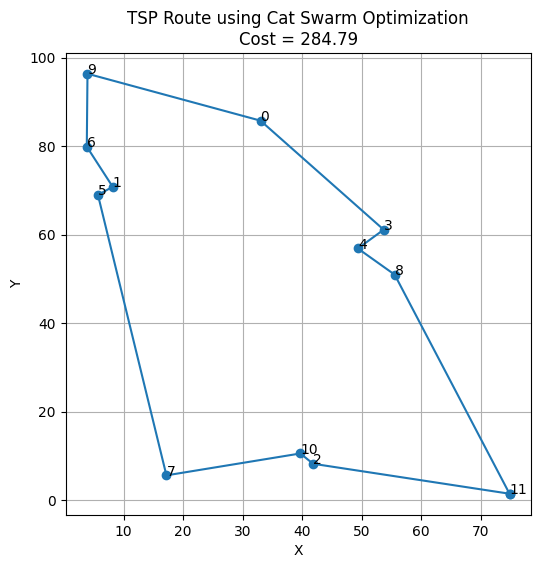

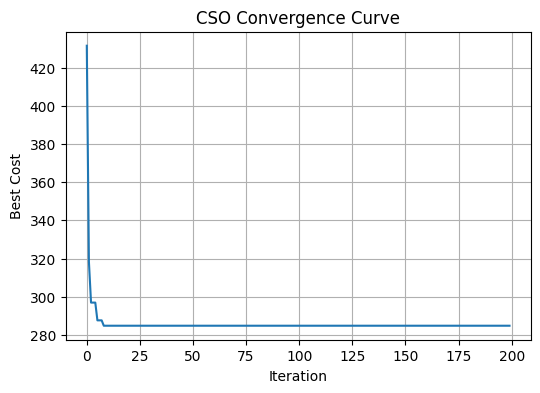

In [4]:
import numpy as np
import matplotlib.pyplot as plt
import random


# -----------------------------  
# TSP Utilities  
# -----------------------------  
def tour_length(tour, dist_matrix):
    total = 0
    for i in range(len(tour)):
        total += dist_matrix[tour[i]][tour[(i + 1) % len(tour)]]
    return total


# -----------------------------  
# Cat Object  
# -----------------------------  
class Cat:
    def __init__(self, num_cities):
        self.position = list(range(num_cities))
        random.shuffle(self.position)
        self.fitness = None
        self.mode = "seeking"


# -----------------------------  
# Seeking Mode  
# -----------------------------  
def seeking_mode(cat, dist_matrix, SMP=5):
    best_route = cat.position
    best_cost = tour_length(best_route, dist_matrix)

    for _ in range(SMP):
        new_route = best_route.copy()

        # Random swap
        i, j = random.sample(range(len(new_route)), 2)
        new_route[i], new_route[j] = new_route[j], new_route[i]

        new_cost = tour_length(new_route, dist_matrix)
        if new_cost < best_cost:
            best_cost = new_cost
            best_route = new_route

    cat.position = best_route
    cat.fitness = best_cost


# -----------------------------  
# Tracing Mode  
# -----------------------------  
def tracing_mode(cat, global_best):
    route = cat.position.copy()
    gb = global_best.copy()

    i, j = sorted(random.sample(range(len(route)), 2))
    segment = gb[i:j]

    new_route = [c for c in route if c not in segment]
    new_route[i:i] = segment

    cat.position = new_route


# -----------------------------  
# Cat Swarm Optimization (TSP)  
# -----------------------------  
def CSO_TSP(dist_matrix, num_cats=30, iterations=200, MR=0.2):
    num_cities = len(dist_matrix)
    cats = [Cat(num_cities) for _ in range(num_cats)]

    # Evaluate initial cats
    for cat in cats:
        cat.fitness = tour_length(cat.position, dist_matrix)

    global_best = min(cats, key=lambda c: c.fitness).position.copy()
    global_best_cost = tour_length(global_best, dist_matrix)

    convergence = []  # For storing best cost per iteration

    for it in range(iterations):

        for cat in cats:
            cat.mode = "tracing" if random.random() < MR else "seeking"

        for cat in cats:
            if cat.mode == "seeking":
                seeking_mode(cat, dist_matrix)
            else:
                tracing_mode(cat, global_best)
                cat.fitness = tour_length(cat.position, dist_matrix)

        best_cat = min(cats, key=lambda c: c.fitness)

        if best_cat.fitness < global_best_cost:
            global_best_cost = best_cat.fitness
            global_best = best_cat.position.copy()

        convergence.append(global_best_cost)

        if it % 20 == 0:
            print(f"Iteration {it} | Best Cost = {global_best_cost}")

    return global_best, global_best_cost, convergence


# -----------------------------  
# Main Execution  
# -----------------------------  
if __name__ == "__main__":

    # Create random cities  
    num_cities = 12
    coords = np.random.rand(num_cities, 2) * 100

    # Distance matrix  
    dist_matrix = np.zeros((num_cities, num_cities))
    for i in range(num_cities):
        for j in range(num_cities):
            dist_matrix[i][j] = np.linalg.norm(coords[i] - coords[j])

    # Run CSO  
    best_route, best_cost, convergence = CSO_TSP(dist_matrix)

    print("\nBest Route:", best_route)
    print("Best Cost :", best_cost)

    # -----------------------------
    # Plot the best route
    # -----------------------------
    route_coords = coords[best_route + [best_route[0]]]

    plt.figure(figsize=(6, 6))
    plt.plot(route_coords[:, 0], route_coords[:, 1], marker='o')

    for i, c in enumerate(best_route):
        plt.text(coords[c][0], coords[c][1], str(c))

    plt.title(f"TSP Route using Cat Swarm Optimization\nCost = {best_cost:.2f}")
    plt.xlabel("X")
    plt.ylabel("Y")
    plt.grid(True)
    plt.show()

    # -----------------------------
    # Plot convergence curve
    # -----------------------------
    plt.figure(figsize=(6, 4))
    plt.plot(convergence)
    plt.title("CSO Convergence Curve")
    plt.xlabel("Iteration")
    plt.ylabel("Best Cost")
    plt.grid(True)
    plt.show()
